In [2]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset, get_project_path, gasp as GASP

In [3]:
method = 'linear'

In [4]:
path = get_project_path()
M = dataset.load_dataset9a(path)
M.shape

Data: 20231222_GASP_PHANTOM data exists
Path: ../..\gasp\../data\20231222_GASP_PHANTOM\dixon\
Loading files: ['meas_MID210_gre_TE3p41_FID58122.dat', 'meas_MID211_gre_TE4p55_FID58123.dat', 'meas_MID212_gre_TE5p68_FID58124.dat']
pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

(128, 128, 8, 3)

In [26]:
M0 = M[:,:,:,0]
M1 = M[:,:,:,1]
M2 = M[:,:,:,2]

field_map = np.angle(np.conjugate(M0) * M2)
f = np.exp(-1j * field_map / 2)
Mw = M0 + M1
Mf = M0 - M1
Mw3 = M0 + M1 * np.exp(-1j * field_map / 2)
Mf3 = M0 - M1 * np.exp(-1j * field_map / 2)

Mw = np.sqrt(np.sum(np.abs(Mw)**2, axis=2))
Mf = np.sqrt(np.sum(np.abs(Mf)**2, axis=2))
Mw3 = np.sqrt(np.sum(np.abs(Mw3)**2, axis=2))
Mf3 = np.sqrt(np.sum(np.abs(Mf3)**2, axis=2))

[]

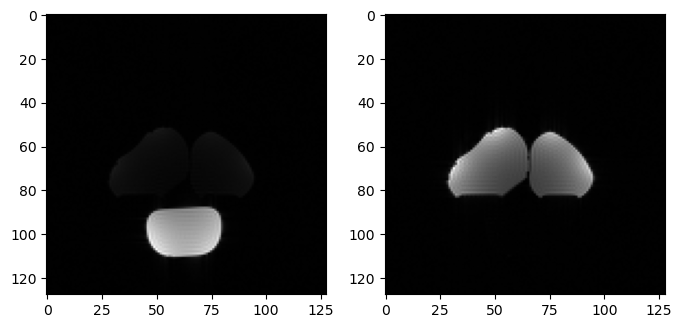

In [27]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2, 2, 1)
ax2 = f.add_subplot(2, 2, 2)
ax.imshow(np.abs(Mw3), cmap='gray')
ax2.imshow(np.abs(Mf3), cmap='gray')
plt.plot()

[]

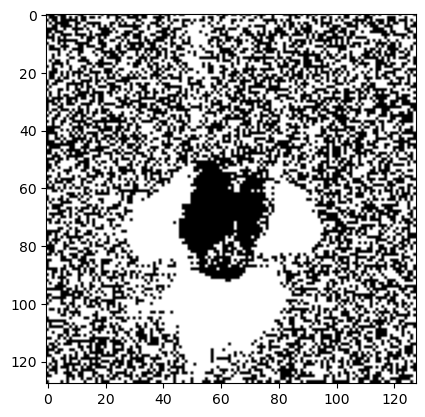

In [7]:
plt.imshow(np.angle(field_map[:,:,0]), cmap='gray')
plt.plot()

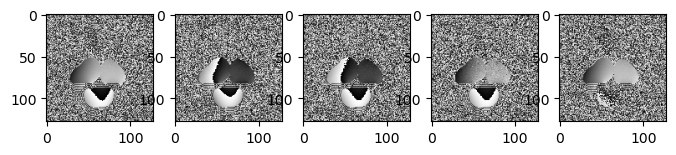

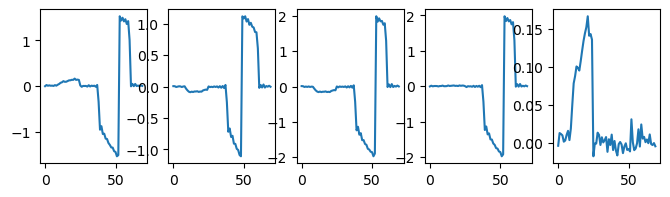

In [47]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(1, 5, 1)
ax2 = f.add_subplot(1, 5, 2)
ax3 = f.add_subplot(1, 5, 3)
ax4 = f.add_subplot(1, 5, 4)
ax5 = f.add_subplot(1, 5, 5)
ax.imshow(np.angle(M0)[:,:,0], cmap='gray')
ax2.imshow(np.angle(M1)[:,:,0], cmap='gray')
ax3.imshow(np.angle(M1 * np.exp(-1j * field_map / 2))[:,:,0], cmap='gray')
ax4.imshow(np.angle(M0 + M1 * np.exp(-1j * field_map / 2))[:,:,0], cmap='gray')
ax5.imshow(np.angle(M0 - M1 * np.exp(-1j * field_map / 2))[:,:,0], cmap='gray')
plt.plot()
plt.show()

def scale_by_mag(M):
    return np.abs(M / np.max(M))

def scale_phase_by_mag(M):
    return np.abs(M / np.max(M)) * np.angle(M)

f = plt.figure(figsize=(8,2))
ax = f.add_subplot(1, 5, 1)
ax2 = f.add_subplot(1, 5, 2)
ax3 = f.add_subplot(1, 5, 3)
ax4 = f.add_subplot(1, 5, 4)
ax5 = f.add_subplot(1, 5, 5)
ax.plot(scale_phase_by_mag(M0)[50:120,64,0])
ax2.plot(scale_phase_by_mag(M1)[50:120,64,0])
ax3.plot(scale_phase_by_mag(M1 * np.exp(-1j * field_map / 2))[50:120,64,0])
ax4.plot(scale_phase_by_mag(M0 + M1 * np.exp(-1j * field_map / 2))[50:120,64,0])
ax5.plot(scale_phase_by_mag(M0 - M1 * np.exp(-1j * field_map / 2))[50:120,64,0])
plt.plot()
plt.show()


In [50]:
M_phantom20 = dataset.load_dataset9b(path)
M_phantom90 = dataset.load_dataset9c(path)

Data: 20231222_GASP_PHANTOM data exists
Path: ../..\gasp\../data\20231222_GASP_PHANTOM\gasp_fa20\
Loading files: ['meas_MID219_bSSFP_gasp_knee_fa20_1x1x2_2D_TR6ms_FID58131.dat', 'meas_MID220_bSSFP_gasp_knee_fa20_1x1x2_2D_TR12ms_FID58132.dat', 'meas_MID221_bSSFP_gasp_knee_fa20_1x1x2_2D_TR24ms_FID58133.dat']
pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

Data: 20231222_GASP_PHANTOM data exists
Path: ../..\gasp\../data\20231222_GASP_PHANTOM\gasp_fa90\
Loading files: ['meas_MID216_bSSFP_gasp_knee_fa90_1x1x2_2D_TR6ms_FID58128.dat', 'meas_MID217_bSSFP_gasp_knee_fa90_1x1x2_2D_TR12ms_FID58129.dat', 'meas_MID218_bSSFP_gasp_knee_fa90_1x1x2_2D_TR24ms_FID58130.dat']
pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

In [167]:
def train(alpha, bw, shift, method="linear"):
    width = 256
    height = 1
    npcs = 16
    TRs = [5e-3, 10e-3, 20e-3]
    alpha = np.deg2rad(alpha)
    gradient = 2 * np.pi
    phantom_type = 'line'
    
    D = responses.gaussian(width, bw=bw, shift=shift)
    M = simulation.simulate_ssfp(width=width, height=height, npcs=npcs, TRs=TRs, alpha=alpha, gradient=gradient, phantom_type=phantom_type, phantom_padding=16)
    Ic, An = simulation.train_gasp(M, D, clines=2, method=method)
    An = np.array(An)[0]
    return Ic, An, M

(1, 256)
(1, 256)


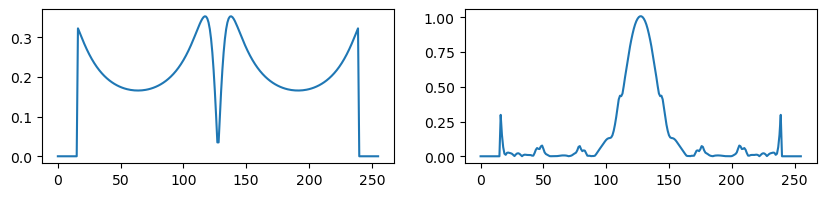

In [158]:
def plot_training(alpha = 20, bw = 0.2, shift = 0):
    Ic, An, Mtrain = train(alpha=alpha, bw=bw, shift=shift)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,2))

    _ = np.sqrt(np.sum(np.abs(Mtrain)**2, axis=2))
    _ = abs(_[:,:,0,0])
    print(_.shape)
    ax1.plot(_.T)

    _ = np.abs(Ic)
    print(_.shape)
    ax2.plot(_.T)

In [159]:
def run_gasp(Mdata, An, method="linear"):
    Ic = []
    for cc in range(Mdata.shape[2]):
        Mc = Mdata[:,:,cc,:,:]
        Mc = np.reshape(Mc,(Mc.shape[0], Mc.shape[1], -1))
        _ = GASP.apply_gasp(Mc, An, method=method)
        Ic.append(_)
    Ic = np.array(Ic)
    Ic = np.sqrt(np.sum(np.abs(Ic)**2, axis=0))
    return Ic

In [160]:
def plot_sweep(dataset):
    length = len(dataset)
    print(length)
    f = plt.figure(figsize=(20,6))
    for i in range(length):
        data0 = dataset[i][0]
        data1 = dataset[i][1]
        ax = f.add_subplot(2, length, i + 1)
        ax2 = f.add_subplot(2, length, length + i+1)
        ax.imshow(data0, cmap='gray')
        ax.axis('off')
        ax2.plot(np.abs(data1).T)
        ax2.axis('off')
    plt.show()
    
def gasp_sweep(bw=0.13, alpha = 20, Mdata = M_phantom20, N = 11, start=-0.5, end=0.5, method="linear"):
    dataset = []
    shifts = np.linspace(start, end, N)
    for shift in shifts:
        Ic, An, _ = train(alpha=alpha, bw=bw, shift=shift, method=method)
        output = run_gasp(Mdata, An, method=method)
        dataset.append([output, Ic])
    plot_sweep(dataset)

In [ ]:
def plot_2d_sweep(dataset):
    length = len(dataset)
    f = plt.figure(figsize=(12,12))
    for i in range(length): # shift
        for j in range(length): # bw
            ax = f.add_subplot(length, length, j * length + i + 1)
            ax.imshow(dataset[i][j], cmap='gray')
            #ax1.title.set_text(f" bw:{bw} s:{shift}") 
            ax.axis('off')
    plt.show()
    

def gasp_2d_sweep(Mdata = M_phantom20, alpha = 20, bw0 = 0.1, bw1 = 0.4, s0 = -0.5, s1 = 0.5, N = 11, method="linear"):
    dataset = []
    bws = np.linspace(bw0, bw1, N)
    shifts = np.linspace(s0, s1, N)
    for shift in shifts:
        row = []
        for bw in bws:
            print(f'Compute: bw:{bw} s:{shift}')
            Ic, An, _ = train(alpha=alpha, bw=bw, shift=shift, method=method)
            output = run_gasp(Mdata, An, method=method)
            row.append(output)
        dataset.append(row)
    plot_2d_sweep(dataset)
    return dataset

def gasp_2d_sweep_alpha(Mdata = M_phantom20, bw=0.13, alpha0= 20, alpha1=90, bw0 = 0.1, bw1 = 0.4, s0 = -0.5, s1 = 0.5, N = 11, method="linear"):
    dataset = []
    alphas = np.linspace(alpha0, alpha1, N)
    bws = np.linspace(bw0, bw1, N)
    shifts = np.linspace(s0, s1, N)
    for alpha in alphas:
        row = []
        for shift in shifts:
            print(f'Compute: alpha:{alpha} bw:{bw} s:{shift}')
            Ic, An, _ = train(alpha=alpha, bw=bw, shift=shift, method=method)
            output = run_gasp(Mdata, An, method=method)
            row.append(output)
        dataset.append(row)
    plot_2d_sweep(dataset)
    return dataset    


In [ ]:
plot_training()

11


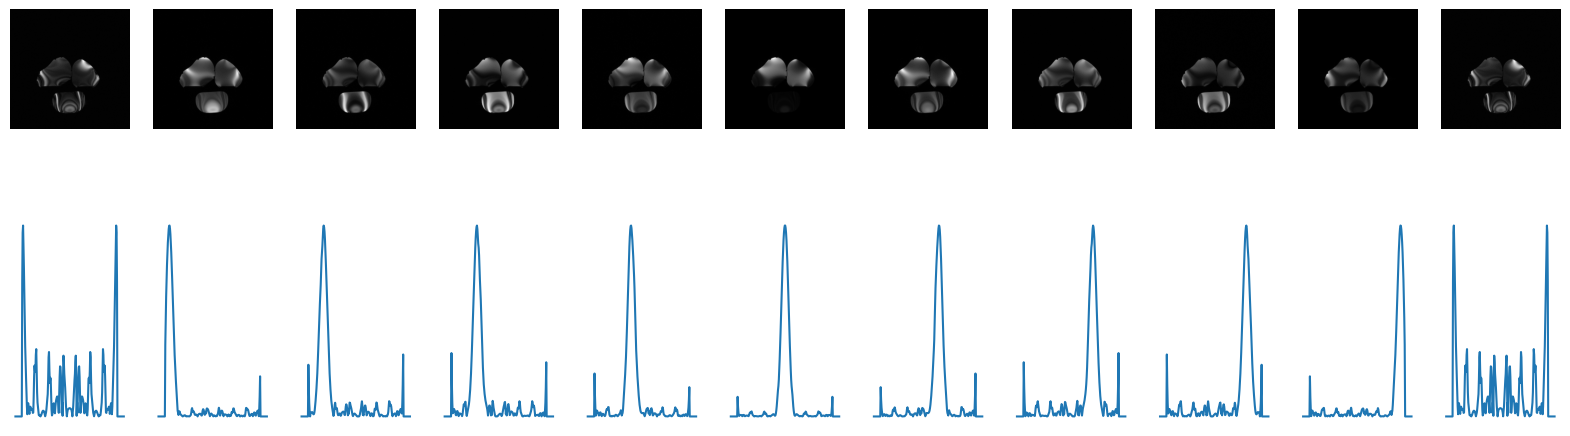

In [161]:
gasp_sweep(bw=0.13, Mdata = M_phantom20)

11


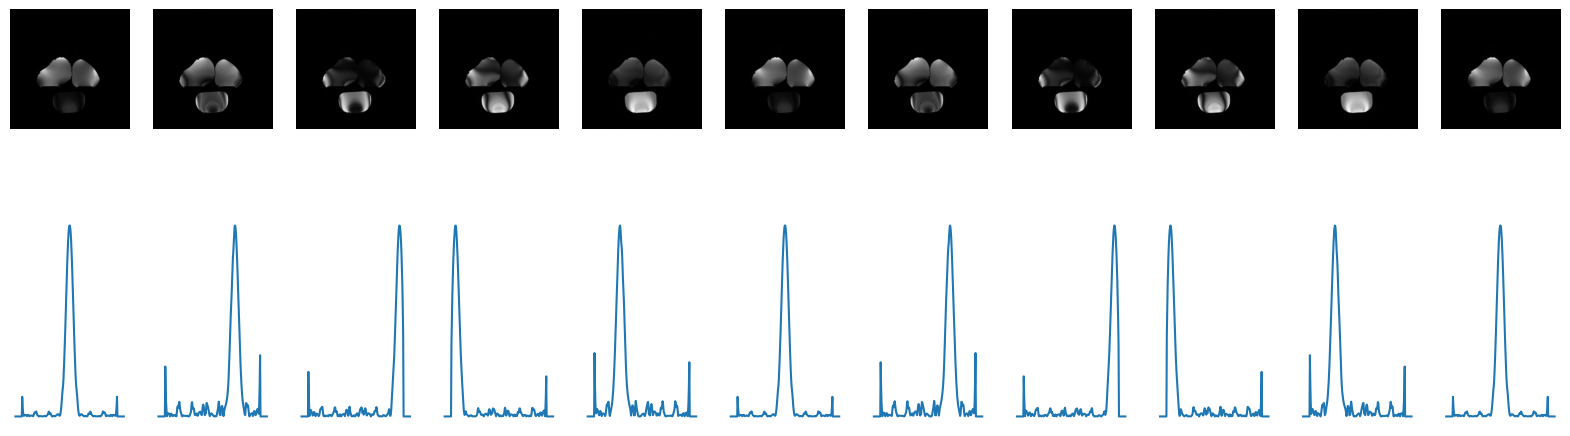

In [162]:
gasp_sweep(bw=0.13, Mdata = M_phantom90, start = -1, end = 1)

Compute: bw:0.1 s:-0.5
Compute: bw:0.13 s:-0.5
Compute: bw:0.16000000000000003 s:-0.5
Compute: bw:0.19000000000000003 s:-0.5
Compute: bw:0.22000000000000003 s:-0.5
Compute: bw:0.25 s:-0.5
Compute: bw:0.28 s:-0.5
Compute: bw:0.31000000000000005 s:-0.5
Compute: bw:0.3400000000000001 s:-0.5
Compute: bw:0.3700000000000001 s:-0.5
Compute: bw:0.4 s:-0.5
Compute: bw:0.1 s:-0.4
Compute: bw:0.13 s:-0.4
Compute: bw:0.16000000000000003 s:-0.4
Compute: bw:0.19000000000000003 s:-0.4
Compute: bw:0.22000000000000003 s:-0.4
Compute: bw:0.25 s:-0.4
Compute: bw:0.28 s:-0.4
Compute: bw:0.31000000000000005 s:-0.4
Compute: bw:0.3400000000000001 s:-0.4
Compute: bw:0.3700000000000001 s:-0.4
Compute: bw:0.4 s:-0.4
Compute: bw:0.1 s:-0.3
Compute: bw:0.13 s:-0.3
Compute: bw:0.16000000000000003 s:-0.3
Compute: bw:0.19000000000000003 s:-0.3
Compute: bw:0.22000000000000003 s:-0.3
Compute: bw:0.25 s:-0.3
Compute: bw:0.28 s:-0.3
Compute: bw:0.31000000000000005 s:-0.3
Compute: bw:0.3400000000000001 s:-0.3
Compute: bw

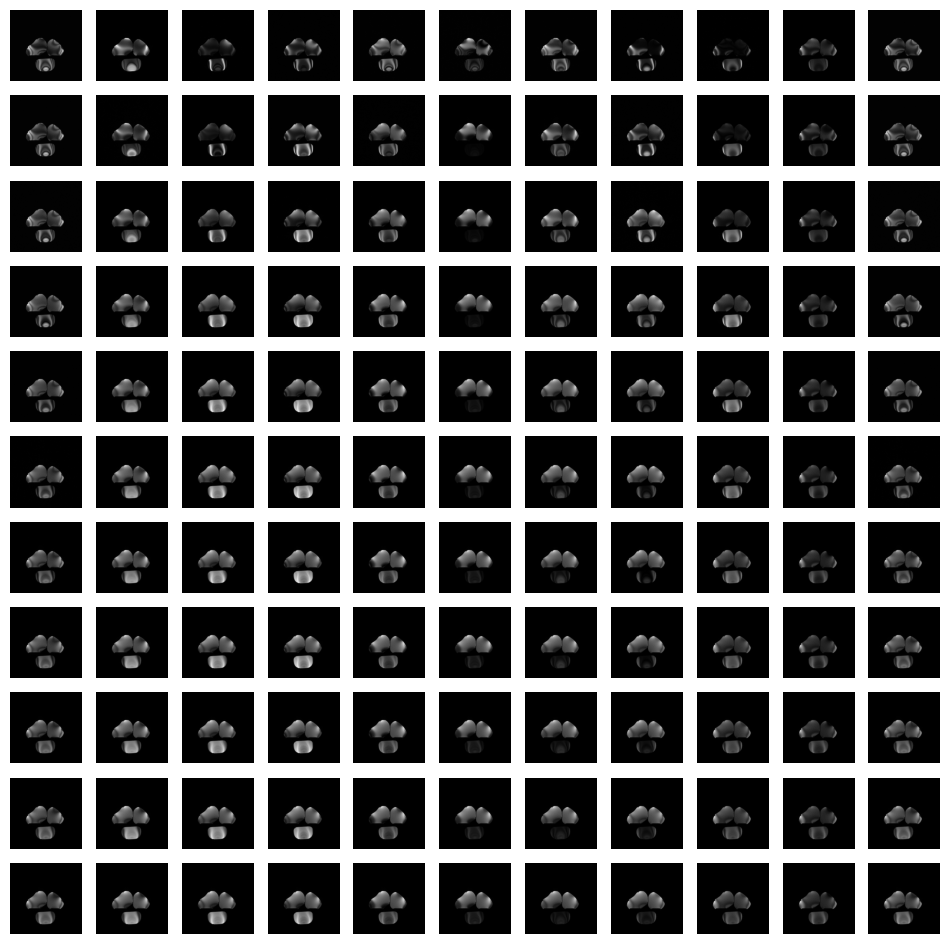

In [137]:
gasp_2d_sweep(M_phantom20)

Compute: bw:0.1 s:-0.5
Compute: bw:0.13 s:-0.5
Compute: bw:0.16000000000000003 s:-0.5
Compute: bw:0.19000000000000003 s:-0.5
Compute: bw:0.22000000000000003 s:-0.5
Compute: bw:0.25 s:-0.5
Compute: bw:0.28 s:-0.5
Compute: bw:0.31000000000000005 s:-0.5
Compute: bw:0.3400000000000001 s:-0.5
Compute: bw:0.3700000000000001 s:-0.5
Compute: bw:0.4 s:-0.5
Compute: bw:0.1 s:-0.4
Compute: bw:0.13 s:-0.4
Compute: bw:0.16000000000000003 s:-0.4
Compute: bw:0.19000000000000003 s:-0.4
Compute: bw:0.22000000000000003 s:-0.4
Compute: bw:0.25 s:-0.4
Compute: bw:0.28 s:-0.4
Compute: bw:0.31000000000000005 s:-0.4
Compute: bw:0.3400000000000001 s:-0.4
Compute: bw:0.3700000000000001 s:-0.4
Compute: bw:0.4 s:-0.4
Compute: bw:0.1 s:-0.3
Compute: bw:0.13 s:-0.3
Compute: bw:0.16000000000000003 s:-0.3
Compute: bw:0.19000000000000003 s:-0.3
Compute: bw:0.22000000000000003 s:-0.3
Compute: bw:0.25 s:-0.3
Compute: bw:0.28 s:-0.3
Compute: bw:0.31000000000000005 s:-0.3
Compute: bw:0.3400000000000001 s:-0.3
Compute: bw

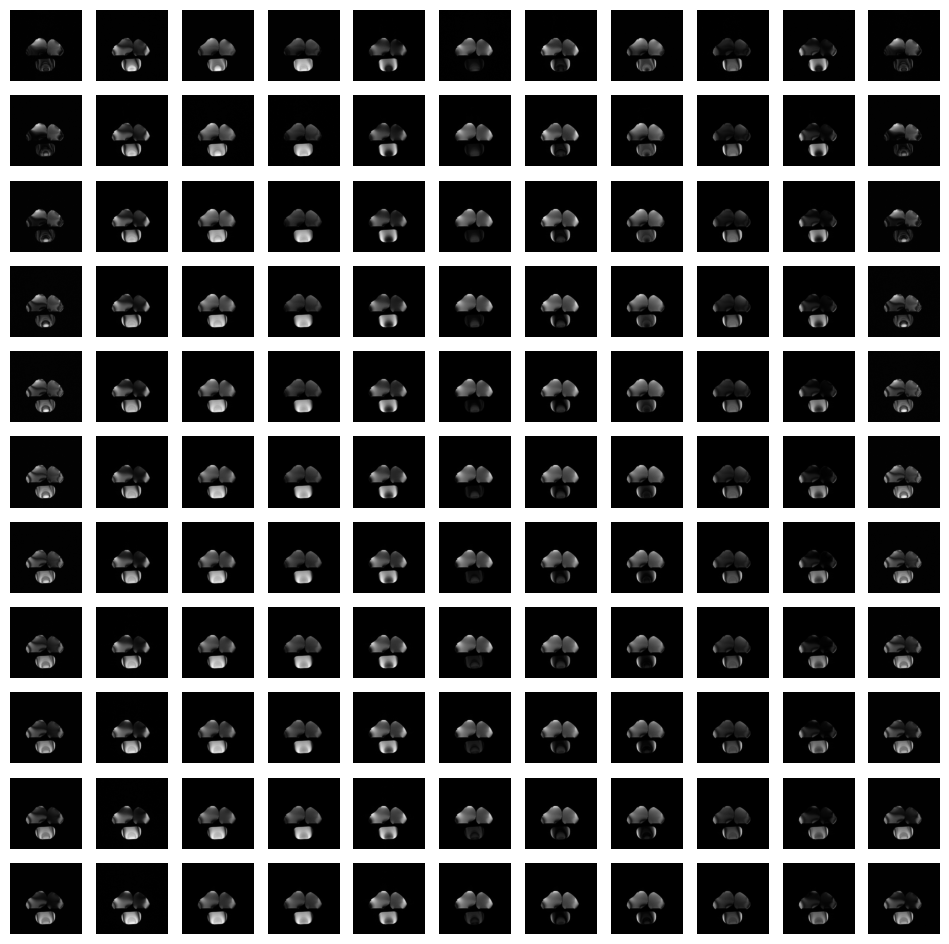

[[array([[2.33339247e-09, 2.10152315e-09, 2.85905494e-09, ...,
          2.83655005e-09, 2.07716794e-09, 2.90470865e-09],
         [2.54579325e-09, 1.30033974e-09, 2.28419077e-09, ...,
          3.09526964e-09, 1.64794375e-09, 1.93210600e-09],
         [3.43902387e-09, 2.31656725e-09, 2.55436251e-09, ...,
          1.67117473e-09, 1.94226927e-09, 2.24103524e-09],
         ...,
         [3.03185836e-09, 2.37834617e-09, 1.89458123e-09, ...,
          2.60743462e-09, 3.03613024e-09, 2.01096139e-09],
         [2.26968391e-09, 2.09449592e-09, 2.55613123e-09, ...,
          2.84608629e-09, 2.20077632e-09, 2.74959654e-09],
         [3.10086170e-09, 1.88964828e-09, 2.55106197e-09, ...,
          2.54659159e-09, 1.79185412e-09, 3.02811265e-09]]),
  array([[1.35106629e-08, 1.32420593e-08, 1.33144252e-08, ...,
          1.67095109e-08, 1.18691275e-08, 1.50827994e-08],
         [1.47249254e-08, 8.20016202e-09, 1.41867876e-08, ...,
          1.60210422e-08, 9.36363511e-09, 1.11171559e-08],
        

In [173]:
gasp_2d_sweep(M_phantom90)

Compute: alpha:20.0 bw:0.13 s:-0.5
Compute: alpha:20.0 bw:0.13 s:-0.4
Compute: alpha:20.0 bw:0.13 s:-0.3
Compute: alpha:20.0 bw:0.13 s:-0.19999999999999996
Compute: alpha:20.0 bw:0.13 s:-0.09999999999999998
Compute: alpha:20.0 bw:0.13 s:0.0
Compute: alpha:20.0 bw:0.13 s:0.10000000000000009
Compute: alpha:20.0 bw:0.13 s:0.20000000000000007
Compute: alpha:20.0 bw:0.13 s:0.30000000000000004
Compute: alpha:20.0 bw:0.13 s:0.4
Compute: alpha:20.0 bw:0.13 s:0.5
Compute: alpha:27.0 bw:0.13 s:-0.5
Compute: alpha:27.0 bw:0.13 s:-0.4
Compute: alpha:27.0 bw:0.13 s:-0.3
Compute: alpha:27.0 bw:0.13 s:-0.19999999999999996
Compute: alpha:27.0 bw:0.13 s:-0.09999999999999998
Compute: alpha:27.0 bw:0.13 s:0.0
Compute: alpha:27.0 bw:0.13 s:0.10000000000000009
Compute: alpha:27.0 bw:0.13 s:0.20000000000000007
Compute: alpha:27.0 bw:0.13 s:0.30000000000000004
Compute: alpha:27.0 bw:0.13 s:0.4
Compute: alpha:27.0 bw:0.13 s:0.5
Compute: alpha:34.0 bw:0.13 s:-0.5
Compute: alpha:34.0 bw:0.13 s:-0.4
Compute: alp

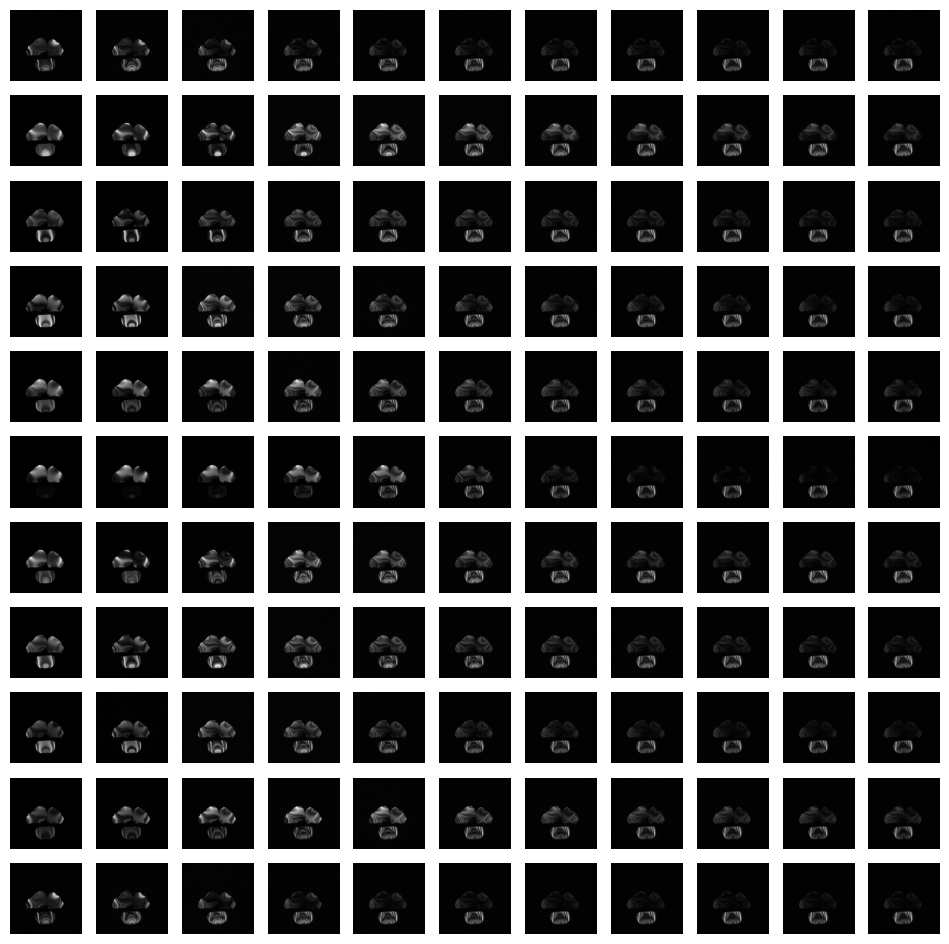

[[array([[1.28580056e-08, 1.50945302e-08, 1.05355883e-08, ...,
          1.54013864e-08, 1.25398421e-08, 1.32922469e-08],
         [1.25979059e-08, 1.83583103e-08, 1.64039565e-08, ...,
          1.10341150e-08, 9.58345673e-09, 1.22710468e-08],
         [1.72669018e-08, 1.00425541e-08, 1.33004253e-08, ...,
          1.06211329e-08, 1.28939887e-08, 1.26669774e-08],
         ...,
         [1.43236747e-08, 1.68176440e-08, 1.18236990e-08, ...,
          1.52065936e-08, 1.64334800e-08, 1.12995303e-08],
         [6.17734147e-09, 1.56482473e-08, 1.65736070e-08, ...,
          1.08834838e-08, 1.53663364e-08, 1.94507031e-08],
         [1.50213845e-08, 1.33771726e-08, 1.35518568e-08, ...,
          1.04399530e-08, 1.50814876e-08, 9.67882601e-09]]),
  array([[9.15193100e-08, 8.03715981e-08, 8.19826341e-08, ...,
          6.42405002e-08, 1.01087188e-07, 9.92686640e-08],
         [5.39606964e-08, 8.00059966e-08, 8.14249562e-08, ...,
          6.09814462e-08, 9.74039552e-08, 8.16564873e-08],
        

In [177]:
gasp_2d_sweep_alpha(M_phantom20, bw=0.13)

Compute: alpha:20.0 bw:0.13 s:-0.5
Compute: alpha:20.0 bw:0.13 s:-0.4
Compute: alpha:20.0 bw:0.13 s:-0.3
Compute: alpha:20.0 bw:0.13 s:-0.19999999999999996
Compute: alpha:20.0 bw:0.13 s:-0.09999999999999998
Compute: alpha:20.0 bw:0.13 s:0.0
Compute: alpha:20.0 bw:0.13 s:0.10000000000000009
Compute: alpha:20.0 bw:0.13 s:0.20000000000000007
Compute: alpha:20.0 bw:0.13 s:0.30000000000000004
Compute: alpha:20.0 bw:0.13 s:0.4
Compute: alpha:20.0 bw:0.13 s:0.5
Compute: alpha:27.0 bw:0.13 s:-0.5
Compute: alpha:27.0 bw:0.13 s:-0.4
Compute: alpha:27.0 bw:0.13 s:-0.3
Compute: alpha:27.0 bw:0.13 s:-0.19999999999999996
Compute: alpha:27.0 bw:0.13 s:-0.09999999999999998
Compute: alpha:27.0 bw:0.13 s:0.0
Compute: alpha:27.0 bw:0.13 s:0.10000000000000009
Compute: alpha:27.0 bw:0.13 s:0.20000000000000007
Compute: alpha:27.0 bw:0.13 s:0.30000000000000004
Compute: alpha:27.0 bw:0.13 s:0.4
Compute: alpha:27.0 bw:0.13 s:0.5
Compute: alpha:34.0 bw:0.13 s:-0.5
Compute: alpha:34.0 bw:0.13 s:-0.4
Compute: alp

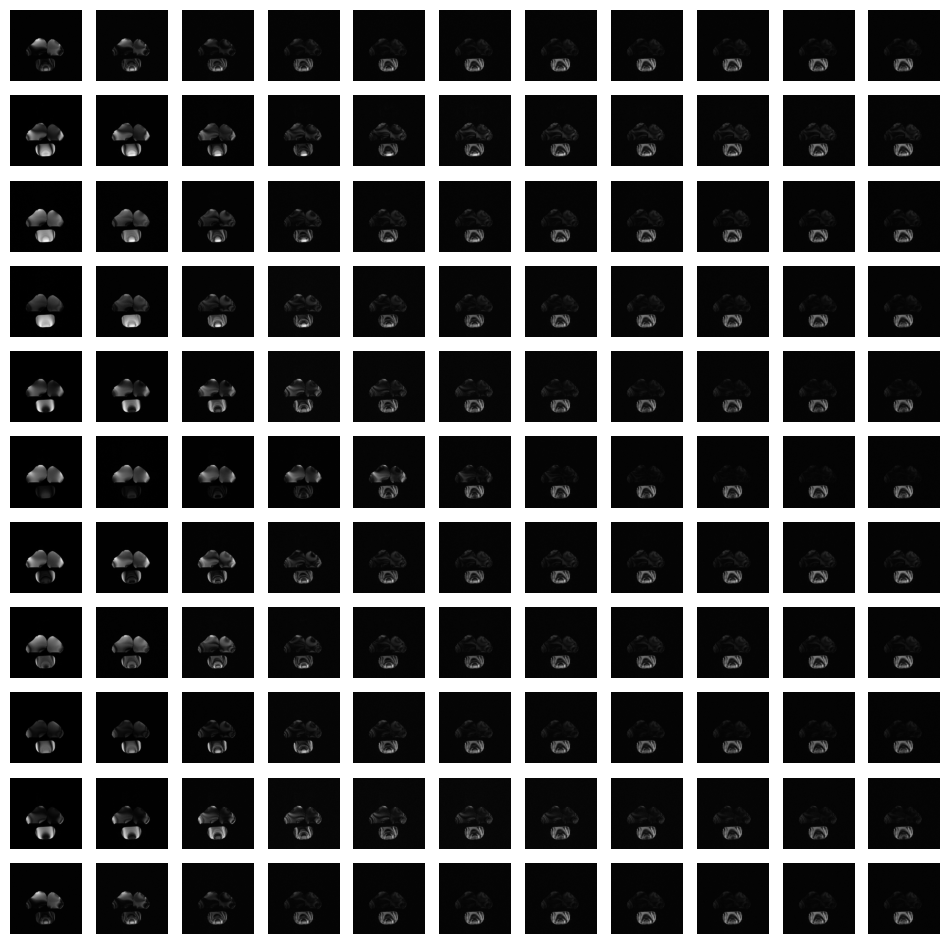

[[array([[1.35106629e-08, 1.32420593e-08, 1.33144252e-08, ...,
          1.67095109e-08, 1.18691275e-08, 1.50827994e-08],
         [1.47249254e-08, 8.20016202e-09, 1.41867876e-08, ...,
          1.60210422e-08, 9.36363511e-09, 1.11171559e-08],
         [1.81714798e-08, 1.15120565e-08, 1.11091358e-08, ...,
          1.05553355e-08, 1.18642707e-08, 1.27911460e-08],
         ...,
         [1.85956782e-08, 1.59846197e-08, 8.01874856e-09, ...,
          1.29042034e-08, 1.56774147e-08, 1.18654948e-08],
         [1.24410875e-08, 1.19775985e-08, 1.42917915e-08, ...,
          1.28663148e-08, 1.02555632e-08, 1.41060658e-08],
         [1.31629703e-08, 1.20501296e-08, 1.43853832e-08, ...,
          1.30954602e-08, 9.35950264e-09, 1.49887277e-08]]),
  array([[1.20532623e-07, 1.13463716e-07, 6.43995361e-08, ...,
          8.90262239e-08, 7.42726518e-08, 7.82936217e-08],
         [9.60760801e-08, 7.53488886e-08, 1.14517947e-07, ...,
          7.80015537e-08, 6.56757250e-08, 7.31632794e-08],
        

In [178]:
gasp_2d_sweep_alpha(M_phantom90, bw=0.13)

Compute: alpha:20.0 bw:0.2 s:-0.5
Compute: alpha:20.0 bw:0.2 s:-0.4
Compute: alpha:20.0 bw:0.2 s:-0.3
Compute: alpha:20.0 bw:0.2 s:-0.19999999999999996
Compute: alpha:20.0 bw:0.2 s:-0.09999999999999998
Compute: alpha:20.0 bw:0.2 s:0.0
Compute: alpha:20.0 bw:0.2 s:0.10000000000000009
Compute: alpha:20.0 bw:0.2 s:0.20000000000000007
Compute: alpha:20.0 bw:0.2 s:0.30000000000000004
Compute: alpha:20.0 bw:0.2 s:0.4
Compute: alpha:20.0 bw:0.2 s:0.5
Compute: alpha:27.0 bw:0.2 s:-0.5
Compute: alpha:27.0 bw:0.2 s:-0.4
Compute: alpha:27.0 bw:0.2 s:-0.3
Compute: alpha:27.0 bw:0.2 s:-0.19999999999999996
Compute: alpha:27.0 bw:0.2 s:-0.09999999999999998
Compute: alpha:27.0 bw:0.2 s:0.0
Compute: alpha:27.0 bw:0.2 s:0.10000000000000009
Compute: alpha:27.0 bw:0.2 s:0.20000000000000007
Compute: alpha:27.0 bw:0.2 s:0.30000000000000004
Compute: alpha:27.0 bw:0.2 s:0.4
Compute: alpha:27.0 bw:0.2 s:0.5
Compute: alpha:34.0 bw:0.2 s:-0.5
Compute: alpha:34.0 bw:0.2 s:-0.4
Compute: alpha:34.0 bw:0.2 s:-0.3
Co

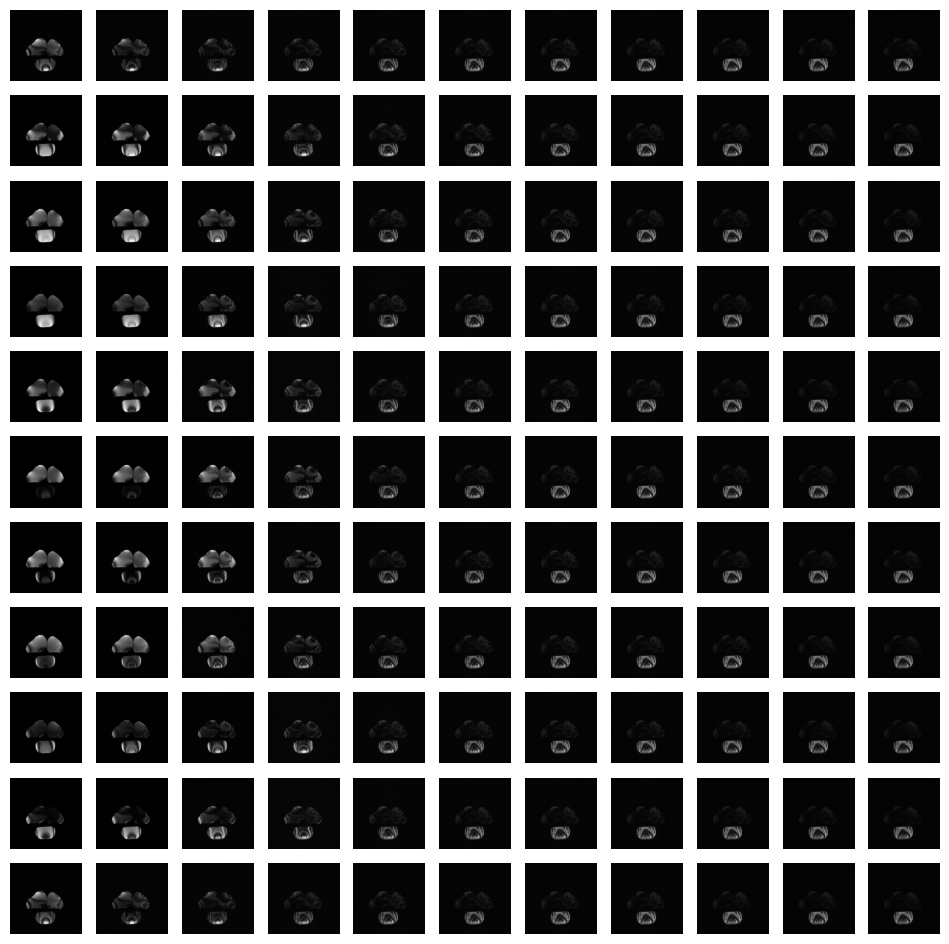

[[array([[7.48284529e-08, 6.35636140e-08, 5.23390612e-08, ...,
          7.41214572e-08, 5.69266955e-08, 6.69015273e-08],
         [6.87886143e-08, 4.75339761e-08, 7.00532534e-08, ...,
          8.17665514e-08, 4.38549030e-08, 5.49424208e-08],
         [7.54955596e-08, 5.00389647e-08, 4.49491568e-08, ...,
          5.32603758e-08, 5.83730118e-08, 5.77599473e-08],
         ...,
         [8.18308239e-08, 8.00154573e-08, 4.65752630e-08, ...,
          6.21817261e-08, 6.97638706e-08, 5.95918611e-08],
         [5.58000047e-08, 5.08418482e-08, 6.24570127e-08, ...,
          5.25235951e-08, 4.87576781e-08, 6.57817552e-08],
         [5.81447543e-08, 6.85437103e-08, 6.64860750e-08, ...,
          5.37680941e-08, 4.61297716e-08, 6.14765941e-08]]),
  array([[1.33074492e-07, 9.65124295e-08, 8.37493607e-08, ...,
          8.87430470e-08, 7.46627931e-08, 1.03715047e-07],
         [1.05865120e-07, 7.48952706e-08, 1.16675424e-07, ...,
          1.14053218e-07, 7.36655419e-08, 7.77959806e-08],
        

In [179]:
gasp_2d_sweep_alpha(M_phantom90, bw=0.2)

Compute: alpha:20.0 bw:0.5 s:-0.5
Compute: alpha:20.0 bw:0.5 s:-0.4
Compute: alpha:20.0 bw:0.5 s:-0.3
Compute: alpha:20.0 bw:0.5 s:-0.19999999999999996
Compute: alpha:20.0 bw:0.5 s:-0.09999999999999998
Compute: alpha:20.0 bw:0.5 s:0.0
Compute: alpha:20.0 bw:0.5 s:0.10000000000000009
Compute: alpha:20.0 bw:0.5 s:0.20000000000000007
Compute: alpha:20.0 bw:0.5 s:0.30000000000000004
Compute: alpha:20.0 bw:0.5 s:0.4
Compute: alpha:20.0 bw:0.5 s:0.5
Compute: alpha:27.0 bw:0.5 s:-0.5
Compute: alpha:27.0 bw:0.5 s:-0.4
Compute: alpha:27.0 bw:0.5 s:-0.3
Compute: alpha:27.0 bw:0.5 s:-0.19999999999999996
Compute: alpha:27.0 bw:0.5 s:-0.09999999999999998
Compute: alpha:27.0 bw:0.5 s:0.0
Compute: alpha:27.0 bw:0.5 s:0.10000000000000009
Compute: alpha:27.0 bw:0.5 s:0.20000000000000007
Compute: alpha:27.0 bw:0.5 s:0.30000000000000004
Compute: alpha:27.0 bw:0.5 s:0.4
Compute: alpha:27.0 bw:0.5 s:0.5
Compute: alpha:34.0 bw:0.5 s:-0.5
Compute: alpha:34.0 bw:0.5 s:-0.4
Compute: alpha:34.0 bw:0.5 s:-0.3
Co

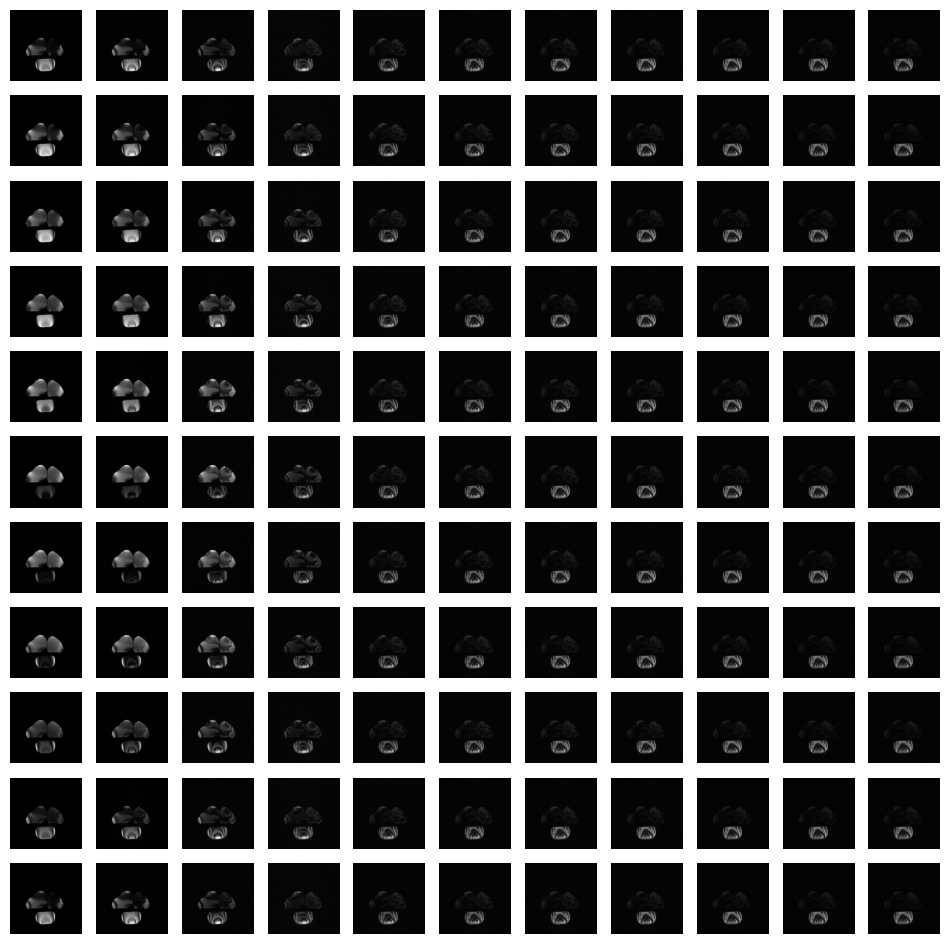

[[array([[2.66432567e-07, 2.08938110e-07, 1.91390723e-07, ...,
          1.99349799e-07, 1.71440383e-07, 2.19881898e-07],
         [2.17753853e-07, 1.52129365e-07, 2.20255060e-07, ...,
          2.72815833e-07, 1.55235955e-07, 1.67171812e-07],
         [2.38683970e-07, 1.45349097e-07, 1.78821446e-07, ...,
          1.87413288e-07, 1.88783950e-07, 1.56415038e-07],
         ...,
         [2.69672903e-07, 2.75670623e-07, 1.44823284e-07, ...,
          2.21651085e-07, 2.22309941e-07, 1.94108246e-07],
         [1.69703455e-07, 1.74902688e-07, 2.00510484e-07, ...,
          1.56964429e-07, 1.75185875e-07, 2.14706563e-07],
         [2.13714772e-07, 2.10895539e-07, 2.12072630e-07, ...,
          1.74039330e-07, 1.59580561e-07, 2.13359182e-07]]),
  array([[2.78533259e-07, 2.14345777e-07, 1.98775208e-07, ...,
          2.00733910e-07, 1.72107386e-07, 2.33618321e-07],
         [2.30089266e-07, 1.57841477e-07, 2.25929221e-07, ...,
          2.81695338e-07, 1.63019420e-07, 1.62241060e-07],
        

In [181]:
gasp_2d_sweep_alpha(M_phantom90, bw=0.5)